In [3]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("../")
from entropy import entropyUtils
import math

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
PATH_TO_CORPUS = "../entropy_data/jazz_no_drums.txt"
with open(PATH_TO_CORPUS, 'r') as f:
    lines = f.read()
    print(len(set(lines)))

90


In [11]:
print(math.log(90,2))

6.491853096329675


This language consist of: 89 different characters
This language consist of: 598479 different words
music characters entropy: [5.385051148786363, 3.5478048960322512, 3.1934388706713928, 2.839875878065276, 2.36546380350135]
music words entropy: [15.69361230144456, 3.4903298278746617, 1.2151018130848754, 0.43936239270057814, 0.22179242728441223]


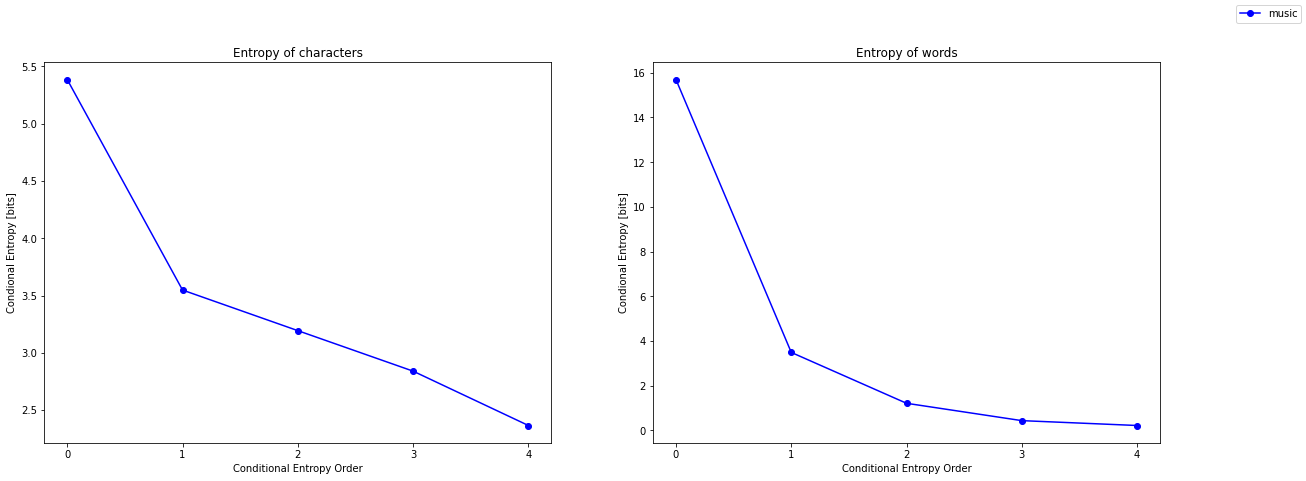

In [12]:
entropyUtils.analyze_entropy(PATH_TO_CORPUS, "music", 5, only_letters=False, force_update=True)

This language consist of: 89 different characters
This language consist of: 529564 different words
music characters entropy: [5.204880471318255, 3.5368179359374228, 3.190574287952809, 2.84794885331164, 2.3713609231353296]
music words entropy: [13.578510356200004, 4.7288927401679715, 1.719827948364889, 0.7864292780707461, 0.48996818627136496]


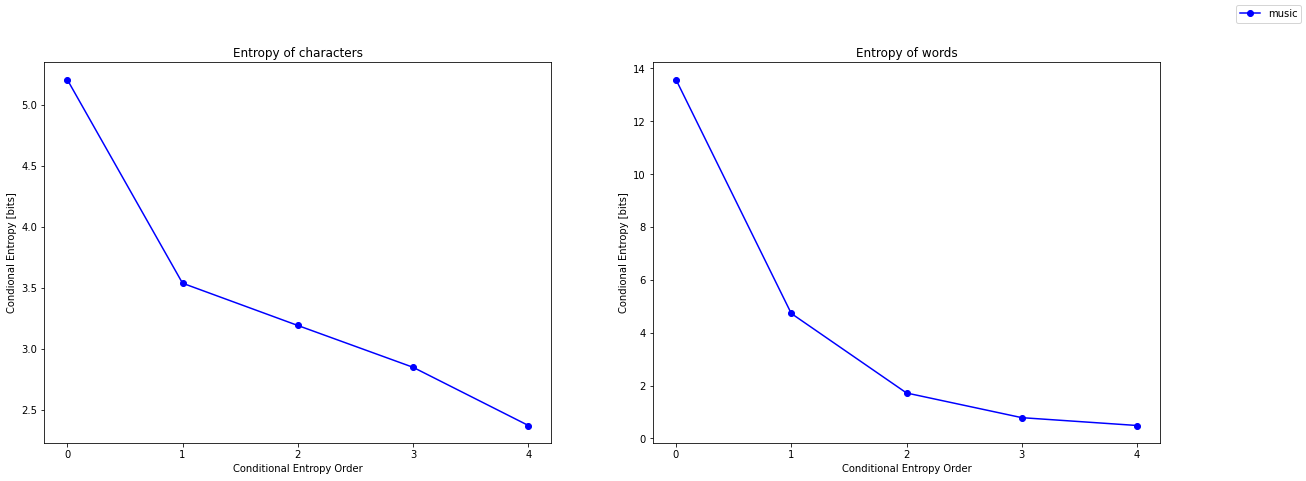

In [14]:
entropyUtils.analyze_entropy(PATH_TO_CORPUS, "music", 5, only_letters=False, force_update=True)

This language consist of: 89 different characters
This language consist of: 480665 different words
music characters entropy: [5.275894776178089, 3.2361856967414178, 2.8282499111379833, 2.4996168987923726, 2.1501241358310237]
music words entropy: [15.730431337862258, 3.3776348598412222, 1.1931019346445775, 0.3614327659063107, 0.14058098708603245]


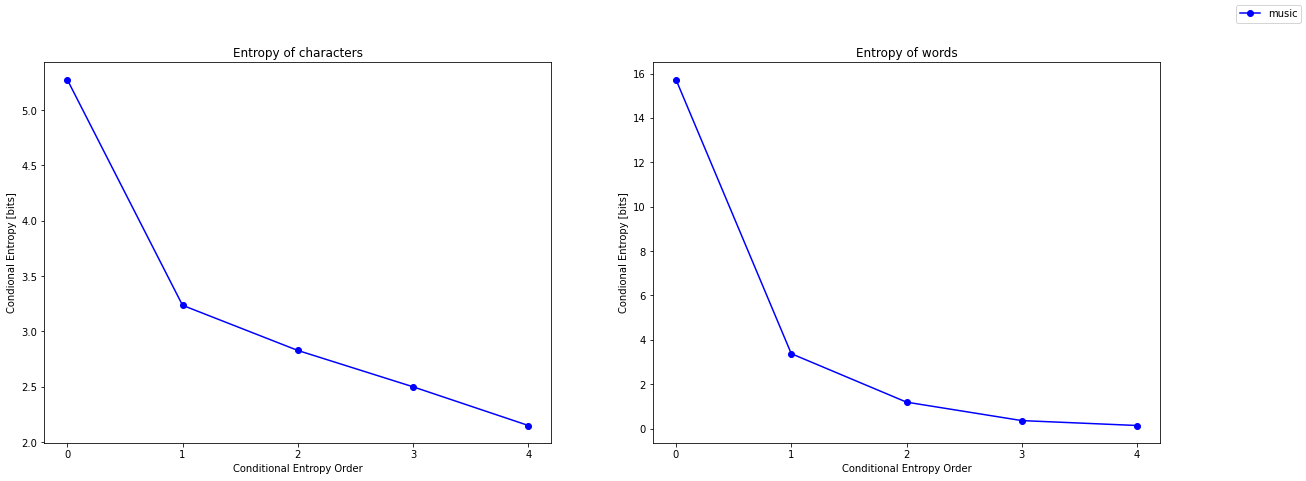

In [16]:
entropyUtils.analyze_entropy(PATH_TO_CORPUS, "music", 5, only_letters=False, force_update=True)

This language consist of: 89 different characters
This language consist of: 512716 different words
music characters entropy: [5.306846030721741, 3.6417416507011375, 3.4110408860323087, 3.062522202073446, 2.490974974035812]
music words entropy: [15.62058199623272, 3.2602681994046265, 1.2137052686353975, 0.4064455172203319, 0.16044587505561403]


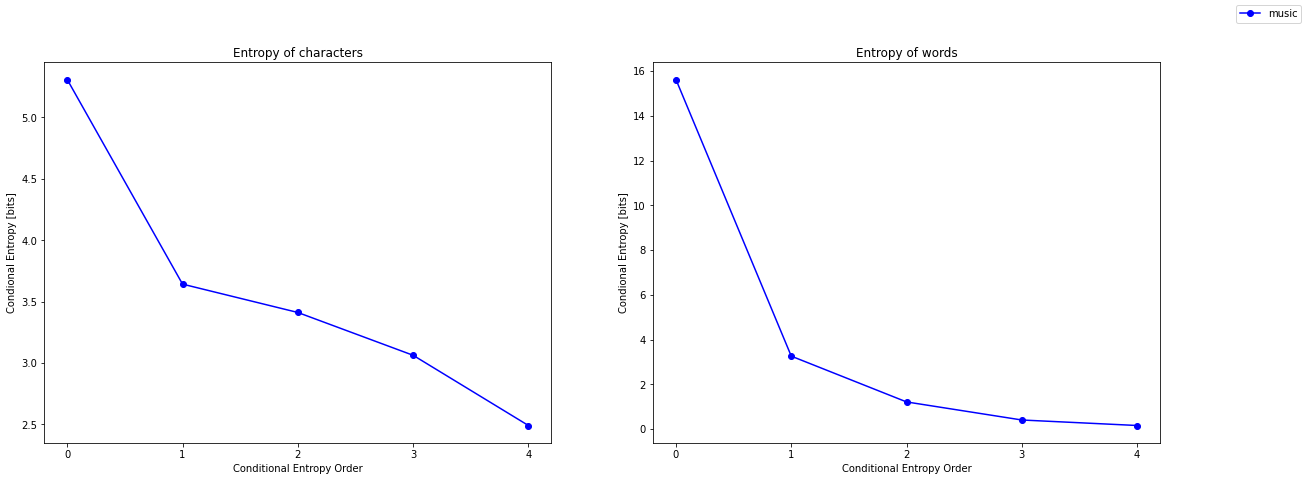

In [18]:
entropyUtils.analyze_entropy(PATH_TO_CORPUS, "music", 5, only_letters=False, force_update=True)